In [10]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: TM
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


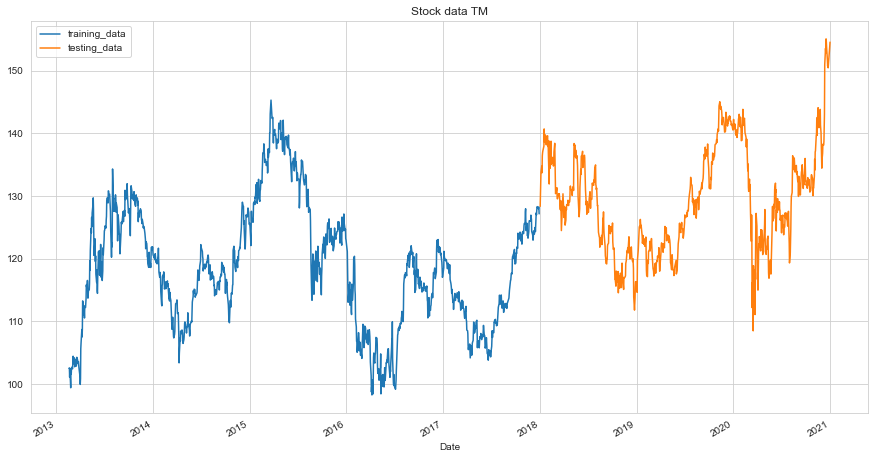

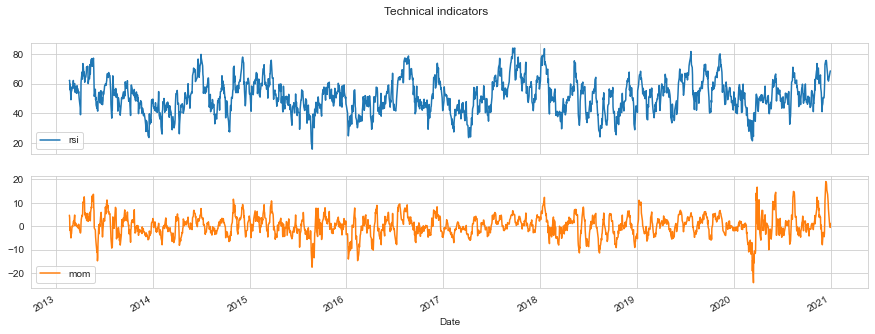

In [11]:
stock_name = 'tm'.upper()
industry = 'Consumer cyclical'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1201.98, duration: 0:00:00.531124
episode: 2/2000, episode end value: 1189.37, duration: 0:00:00.444096
episode: 3/2000, episode end value: 1192.71, duration: 0:00:00.472106
episode: 4/2000, episode end value: 1189.11, duration: 0:00:00.497111
episode: 5/2000, episode end value: 1188.80, duration: 0:00:00.445103
episode: 6/2000, episode end value: 1196.96, duration: 0:00:00.522112
episode: 7/2000, episode end value: 1186.51, duration: 0:00:00.456100
episode: 8/2000, episode end value: 1201.71, duration: 0:00:00.462107
episode: 9/2000, episode end value: 1182.61, duration: 0:00:00.472101
episode: 10/2000, episode end value: 1207.12, duration: 0:00:00.382085
episode: 11/2000, episode end value: 1208.71, duration: 0:00:00.395091
episode: 12/2000, episode end value: 1207.29, duration: 0:00:00.457103
episode: 13/2000, episode end value: 1170.64, duration: 0:00:00.479106
episode: 14/2000, episode end value: 1189.05, duration: 0:00:00.407092
episode: 15/200

episode: 117/2000, episode end value: 1190.88, duration: 0:00:00.349082
episode: 118/2000, episode end value: 1200.82, duration: 0:00:00.351080
episode: 119/2000, episode end value: 1184.35, duration: 0:00:00.335074
episode: 120/2000, episode end value: 1190.36, duration: 0:00:00.318072
episode: 121/2000, episode end value: 1187.93, duration: 0:00:00.358080
episode: 122/2000, episode end value: 1114.56, duration: 0:00:00.440100
episode: 123/2000, episode end value: 1176.99, duration: 0:00:00.351080
episode: 124/2000, episode end value: 1177.14, duration: 0:00:00.352076
episode: 125/2000, episode end value: 1188.41, duration: 0:00:00.391086
episode: 126/2000, episode end value: 1183.46, duration: 0:00:00.371085
episode: 127/2000, episode end value: 1136.06, duration: 0:00:00.364078
episode: 128/2000, episode end value: 1188.51, duration: 0:00:00.316070
episode: 129/2000, episode end value: 1162.64, duration: 0:00:00.382088
episode: 130/2000, episode end value: 1174.25, duration: 0:00:00

episode: 231/2000, episode end value: 1175.31, duration: 0:00:00.333075
episode: 232/2000, episode end value: 1156.61, duration: 0:00:00.339076
episode: 233/2000, episode end value: 1157.84, duration: 0:00:00.307070
episode: 234/2000, episode end value: 1172.38, duration: 0:00:00.318069
episode: 235/2000, episode end value: 1154.59, duration: 0:00:00.326074
episode: 236/2000, episode end value: 1160.02, duration: 0:00:00.284065
episode: 237/2000, episode end value: 1188.40, duration: 0:00:00.302068
episode: 238/2000, episode end value: 1149.87, duration: 0:00:00.332073
episode: 239/2000, episode end value: 1094.88, duration: 0:00:00.368084
episode: 240/2000, episode end value: 1150.56, duration: 0:00:00.362081
episode: 241/2000, episode end value: 1196.07, duration: 0:00:00.377086
episode: 242/2000, episode end value: 1122.77, duration: 0:00:00.381086
episode: 243/2000, episode end value: 1162.95, duration: 0:00:00.270065
episode: 244/2000, episode end value: 1172.96, duration: 0:00:00

episode: 345/2000, episode end value: 1183.54, duration: 0:00:00.324072
episode: 346/2000, episode end value: 1183.76, duration: 0:00:00.310071
episode: 347/2000, episode end value: 1190.45, duration: 0:00:00.337076
episode: 348/2000, episode end value: 1167.37, duration: 0:00:00.339075
episode: 349/2000, episode end value: 1187.47, duration: 0:00:00.354079
episode: 350/2000, episode end value: 1171.92, duration: 0:00:00.355082
episode: 351/2000, episode end value: 1188.06, duration: 0:00:00.304066
episode: 352/2000, episode end value: 1186.92, duration: 0:00:00.332076
episode: 353/2000, episode end value: 1168.13, duration: 0:00:00.349078
episode: 354/2000, episode end value: 1172.25, duration: 0:00:00.361087
episode: 355/2000, episode end value: 1184.10, duration: 0:00:00.322068
episode: 356/2000, episode end value: 1223.75, duration: 0:00:00.300067
episode: 357/2000, episode end value: 1113.26, duration: 0:00:00.443102
episode: 358/2000, episode end value: 1200.11, duration: 0:00:00

episode: 459/2000, episode end value: 1171.38, duration: 0:00:00.324072
episode: 460/2000, episode end value: 1162.05, duration: 0:00:00.365086
episode: 461/2000, episode end value: 1165.25, duration: 0:00:00.320069
episode: 462/2000, episode end value: 1209.81, duration: 0:00:00.342083
episode: 463/2000, episode end value: 1170.33, duration: 0:00:00.347081
episode: 464/2000, episode end value: 1205.98, duration: 0:00:00.310067
episode: 465/2000, episode end value: 1162.24, duration: 0:00:00.313071
episode: 466/2000, episode end value: 1159.94, duration: 0:00:00.334073
episode: 467/2000, episode end value: 1218.79, duration: 0:00:00.345080
episode: 468/2000, episode end value: 1162.95, duration: 0:00:00.344076
episode: 469/2000, episode end value: 1171.03, duration: 0:00:00.342077
episode: 470/2000, episode end value: 1155.03, duration: 0:00:00.294064
episode: 471/2000, episode end value: 1164.93, duration: 0:00:00.401091
episode: 472/2000, episode end value: 1176.69, duration: 0:00:00

episode: 573/2000, episode end value: 1183.56, duration: 0:00:00.365086
episode: 574/2000, episode end value: 1164.00, duration: 0:00:00.324065
episode: 575/2000, episode end value: 1220.89, duration: 0:00:00.355081
episode: 576/2000, episode end value: 1172.40, duration: 0:00:00.324075
episode: 577/2000, episode end value: 1180.87, duration: 0:00:00.362081
episode: 578/2000, episode end value: 1191.61, duration: 0:00:00.330074
episode: 579/2000, episode end value: 1179.45, duration: 0:00:00.366081
episode: 580/2000, episode end value: 1176.48, duration: 0:00:00.311070
episode: 581/2000, episode end value: 1165.50, duration: 0:00:00.373086
episode: 582/2000, episode end value: 1174.06, duration: 0:00:00.379084
episode: 583/2000, episode end value: 1161.69, duration: 0:00:00.278063
episode: 584/2000, episode end value: 1177.49, duration: 0:00:00.358076
episode: 585/2000, episode end value: 1174.66, duration: 0:00:00.314073
episode: 586/2000, episode end value: 1173.85, duration: 0:00:00

episode: 687/2000, episode end value: 1185.88, duration: 0:00:00.391088
episode: 688/2000, episode end value: 1169.29, duration: 0:00:00.430097
episode: 689/2000, episode end value: 1161.08, duration: 0:00:00.392088
episode: 690/2000, episode end value: 1200.69, duration: 0:00:00.303067
episode: 691/2000, episode end value: 1178.38, duration: 0:00:00.365084
episode: 692/2000, episode end value: 1166.42, duration: 0:00:00.466110
episode: 693/2000, episode end value: 1178.21, duration: 0:00:00.354085
episode: 694/2000, episode end value: 1127.50, duration: 0:00:00.419092
episode: 695/2000, episode end value: 1186.23, duration: 0:00:00.314070
episode: 696/2000, episode end value: 1196.64, duration: 0:00:00.316071
episode: 697/2000, episode end value: 1162.71, duration: 0:00:00.323070
episode: 698/2000, episode end value: 1176.61, duration: 0:00:00.392090
episode: 699/2000, episode end value: 1185.89, duration: 0:00:00.327072
episode: 700/2000, episode end value: 1189.34, duration: 0:00:00

episode: 801/2000, episode end value: 1123.25, duration: 0:00:00.347081
episode: 802/2000, episode end value: 1168.29, duration: 0:00:00.357080
episode: 803/2000, episode end value: 1173.18, duration: 0:00:00.352080
episode: 804/2000, episode end value: 1169.80, duration: 0:00:00.330073
episode: 805/2000, episode end value: 1185.73, duration: 0:00:00.391089
episode: 806/2000, episode end value: 1159.99, duration: 0:00:00.305067
episode: 807/2000, episode end value: 1099.31, duration: 0:00:00.344077
episode: 808/2000, episode end value: 1173.10, duration: 0:00:00.351078
episode: 809/2000, episode end value: 1184.10, duration: 0:00:00.341076
episode: 810/2000, episode end value: 1161.09, duration: 0:00:00.391089
episode: 811/2000, episode end value: 1166.03, duration: 0:00:00.332075
episode: 812/2000, episode end value: 1111.48, duration: 0:00:00.352076
episode: 813/2000, episode end value: 1174.43, duration: 0:00:00.324072
episode: 814/2000, episode end value: 1164.10, duration: 0:00:00

episode: 915/2000, episode end value: 1160.03, duration: 0:00:00.373079
episode: 916/2000, episode end value: 1209.33, duration: 0:00:00.317072
episode: 917/2000, episode end value: 1135.34, duration: 0:00:00.284064
episode: 918/2000, episode end value: 1171.80, duration: 0:00:00.373080
episode: 919/2000, episode end value: 1105.78, duration: 0:00:00.354080
episode: 920/2000, episode end value: 1162.87, duration: 0:00:00.285066
episode: 921/2000, episode end value: 1177.48, duration: 0:00:00.353074
episode: 922/2000, episode end value: 1166.05, duration: 0:00:00.344076
episode: 923/2000, episode end value: 1181.34, duration: 0:00:00.318071
episode: 924/2000, episode end value: 1175.25, duration: 0:00:00.330075
episode: 925/2000, episode end value: 1194.71, duration: 0:00:00.398090
episode: 926/2000, episode end value: 1162.84, duration: 0:00:00.396086
episode: 927/2000, episode end value: 1104.60, duration: 0:00:00.376082
episode: 928/2000, episode end value: 1177.40, duration: 0:00:00

episode: 1029/2000, episode end value: 1177.26, duration: 0:00:00.313072
episode: 1030/2000, episode end value: 1201.60, duration: 0:00:00.348082
episode: 1031/2000, episode end value: 1173.66, duration: 0:00:00.330074
episode: 1032/2000, episode end value: 1159.05, duration: 0:00:00.322073
episode: 1033/2000, episode end value: 1169.11, duration: 0:00:00.313071
episode: 1034/2000, episode end value: 1179.13, duration: 0:00:00.358080
episode: 1035/2000, episode end value: 1164.46, duration: 0:00:00.395089
episode: 1036/2000, episode end value: 1198.36, duration: 0:00:00.318070
episode: 1037/2000, episode end value: 1166.73, duration: 0:00:00.404090
episode: 1038/2000, episode end value: 1160.85, duration: 0:00:00.353080
episode: 1039/2000, episode end value: 1179.54, duration: 0:00:00.333073
episode: 1040/2000, episode end value: 1163.62, duration: 0:00:00.295068
episode: 1041/2000, episode end value: 1187.70, duration: 0:00:00.333074
episode: 1042/2000, episode end value: 1174.33, dur

episode: 1142/2000, episode end value: 1175.95, duration: 0:00:00.397086
episode: 1143/2000, episode end value: 1191.22, duration: 0:00:00.279064
episode: 1144/2000, episode end value: 1164.97, duration: 0:00:00.358080
episode: 1145/2000, episode end value: 1183.00, duration: 0:00:00.333075
episode: 1146/2000, episode end value: 1172.41, duration: 0:00:00.298064
episode: 1147/2000, episode end value: 1177.65, duration: 0:00:00.370084
episode: 1148/2000, episode end value: 1158.13, duration: 0:00:00.385088
episode: 1149/2000, episode end value: 1168.36, duration: 0:00:00.319070
episode: 1150/2000, episode end value: 1166.38, duration: 0:00:00.364081
episode: 1151/2000, episode end value: 1187.07, duration: 0:00:00.346080
episode: 1152/2000, episode end value: 1180.52, duration: 0:00:00.417092
episode: 1153/2000, episode end value: 1180.97, duration: 0:00:00.366080
episode: 1154/2000, episode end value: 1130.22, duration: 0:00:00.360083
episode: 1155/2000, episode end value: 1156.40, dur

episode: 1255/2000, episode end value: 1184.83, duration: 0:00:00.385084
episode: 1256/2000, episode end value: 1120.57, duration: 0:00:00.370084
episode: 1257/2000, episode end value: 1172.49, duration: 0:00:00.454103
episode: 1258/2000, episode end value: 1111.42, duration: 0:00:00.366081
episode: 1259/2000, episode end value: 1171.37, duration: 0:00:00.332074
episode: 1260/2000, episode end value: 1176.42, duration: 0:00:00.339075
episode: 1261/2000, episode end value: 1158.39, duration: 0:00:00.376085
episode: 1262/2000, episode end value: 1176.92, duration: 0:00:00.365082
episode: 1263/2000, episode end value: 1179.88, duration: 0:00:00.370084
episode: 1264/2000, episode end value: 1175.34, duration: 0:00:00.328071
episode: 1265/2000, episode end value: 1168.75, duration: 0:00:00.420095
episode: 1266/2000, episode end value: 1123.49, duration: 0:00:00.323074
episode: 1267/2000, episode end value: 1178.15, duration: 0:00:00.307069
episode: 1268/2000, episode end value: 1170.98, dur

episode: 1368/2000, episode end value: 1149.38, duration: 0:00:00.405091
episode: 1369/2000, episode end value: 1189.44, duration: 0:00:00.429090
episode: 1370/2000, episode end value: 1176.14, duration: 0:00:00.323072
episode: 1371/2000, episode end value: 1121.01, duration: 0:00:00.356081
episode: 1372/2000, episode end value: 1183.28, duration: 0:00:00.387086
episode: 1373/2000, episode end value: 1183.56, duration: 0:00:00.287064
episode: 1374/2000, episode end value: 1118.41, duration: 0:00:00.311071
episode: 1375/2000, episode end value: 1188.71, duration: 0:00:00.390089
episode: 1376/2000, episode end value: 1177.83, duration: 0:00:00.319071
episode: 1377/2000, episode end value: 1176.19, duration: 0:00:00.309068
episode: 1378/2000, episode end value: 1193.32, duration: 0:00:00.306067
episode: 1379/2000, episode end value: 1191.23, duration: 0:00:00.370086
episode: 1380/2000, episode end value: 1122.15, duration: 0:00:00.354080
episode: 1381/2000, episode end value: 1178.65, dur

episode: 1481/2000, episode end value: 1181.01, duration: 0:00:00.330072
episode: 1482/2000, episode end value: 1203.89, duration: 0:00:00.278064
episode: 1483/2000, episode end value: 1166.20, duration: 0:00:00.330072
episode: 1484/2000, episode end value: 1173.23, duration: 0:00:00.339082
episode: 1485/2000, episode end value: 1185.85, duration: 0:00:00.325067
episode: 1486/2000, episode end value: 1169.36, duration: 0:00:00.329073
episode: 1487/2000, episode end value: 1176.34, duration: 0:00:00.356082
episode: 1488/2000, episode end value: 1171.87, duration: 0:00:00.373085
episode: 1489/2000, episode end value: 1172.08, duration: 0:00:00.313070
episode: 1490/2000, episode end value: 1164.84, duration: 0:00:00.320077
episode: 1491/2000, episode end value: 1152.72, duration: 0:00:00.373085
episode: 1492/2000, episode end value: 1211.79, duration: 0:00:00.319072
episode: 1493/2000, episode end value: 1177.31, duration: 0:00:00.286065
episode: 1494/2000, episode end value: 1150.11, dur

episode: 1594/2000, episode end value: 1181.54, duration: 0:00:00.302066
episode: 1595/2000, episode end value: 1192.88, duration: 0:00:00.272061
episode: 1596/2000, episode end value: 1168.60, duration: 0:00:00.335079
episode: 1597/2000, episode end value: 1166.06, duration: 0:00:00.303070
episode: 1598/2000, episode end value: 1166.74, duration: 0:00:00.277055
episode: 1599/2000, episode end value: 1195.23, duration: 0:00:00.296071
episode: 1600/2000, episode end value: 1169.56, duration: 0:00:00.315068
episode: 1601/2000, episode end value: 1177.53, duration: 0:00:00.390092
episode: 1602/2000, episode end value: 1161.08, duration: 0:00:00.323071
episode: 1603/2000, episode end value: 1159.04, duration: 0:00:00.305071
episode: 1604/2000, episode end value: 1192.29, duration: 0:00:00.303068
episode: 1605/2000, episode end value: 1171.52, duration: 0:00:00.328075
episode: 1606/2000, episode end value: 1158.24, duration: 0:00:00.300064
episode: 1607/2000, episode end value: 1174.40, dur

episode: 1707/2000, episode end value: 1163.20, duration: 0:00:00.285064
episode: 1708/2000, episode end value: 1193.72, duration: 0:00:00.309068
episode: 1709/2000, episode end value: 1176.90, duration: 0:00:00.266062
episode: 1710/2000, episode end value: 1194.43, duration: 0:00:00.301065
episode: 1711/2000, episode end value: 1163.10, duration: 0:00:00.340520
episode: 1712/2000, episode end value: 1172.35, duration: 0:00:00.339073
episode: 1713/2000, episode end value: 1203.05, duration: 0:00:00.286066
episode: 1714/2000, episode end value: 1166.86, duration: 0:00:00.315070
episode: 1715/2000, episode end value: 1165.60, duration: 0:00:00.317072
episode: 1716/2000, episode end value: 1159.87, duration: 0:00:00.285070
episode: 1717/2000, episode end value: 1175.92, duration: 0:00:00.293061
episode: 1718/2000, episode end value: 1108.81, duration: 0:00:00.351080
episode: 1719/2000, episode end value: 1161.86, duration: 0:00:00.375087
episode: 1720/2000, episode end value: 1171.63, dur

episode: 1820/2000, episode end value: 1178.87, duration: 0:00:00.316070
episode: 1821/2000, episode end value: 1171.50, duration: 0:00:00.284065
episode: 1822/2000, episode end value: 1164.58, duration: 0:00:00.308069
episode: 1823/2000, episode end value: 1177.79, duration: 0:00:00.294065
episode: 1824/2000, episode end value: 1170.12, duration: 0:00:00.311071
episode: 1825/2000, episode end value: 1177.24, duration: 0:00:00.311071
episode: 1826/2000, episode end value: 1208.92, duration: 0:00:00.288067
episode: 1827/2000, episode end value: 1182.26, duration: 0:00:00.335072
episode: 1828/2000, episode end value: 1173.84, duration: 0:00:00.338074
episode: 1829/2000, episode end value: 1196.85, duration: 0:00:00.309071
episode: 1830/2000, episode end value: 1177.46, duration: 0:00:00.355080
episode: 1831/2000, episode end value: 1198.30, duration: 0:00:00.309069
episode: 1832/2000, episode end value: 1185.68, duration: 0:00:00.293064
episode: 1833/2000, episode end value: 1113.07, dur

episode: 1933/2000, episode end value: 1191.28, duration: 0:00:00.318073
episode: 1934/2000, episode end value: 1168.29, duration: 0:00:00.366080
episode: 1935/2000, episode end value: 1131.22, duration: 0:00:00.312070
episode: 1936/2000, episode end value: 1185.22, duration: 0:00:00.261062
episode: 1937/2000, episode end value: 1177.44, duration: 0:00:00.317068
episode: 1938/2000, episode end value: 1222.33, duration: 0:00:00.277066
episode: 1939/2000, episode end value: 1165.77, duration: 0:00:00.289062
episode: 1940/2000, episode end value: 1125.94, duration: 0:00:00.282066
episode: 1941/2000, episode end value: 1184.20, duration: 0:00:00.274061
episode: 1942/2000, episode end value: 1179.65, duration: 0:00:00.277060
episode: 1943/2000, episode end value: 1180.24, duration: 0:00:00.299061
episode: 1944/2000, episode end value: 1171.04, duration: 0:00:00.261058
episode: 1945/2000, episode end value: 1191.20, duration: 0:00:00.295069
episode: 1946/2000, episode end value: 1173.87, dur

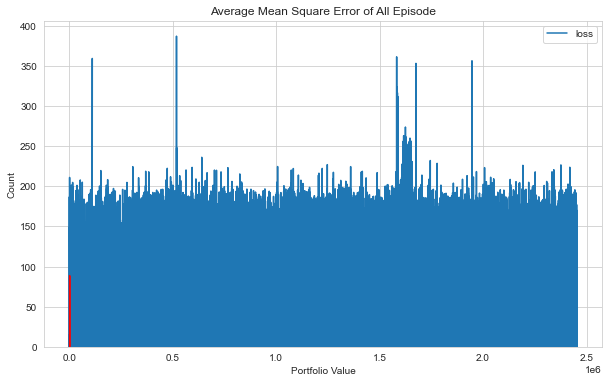

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

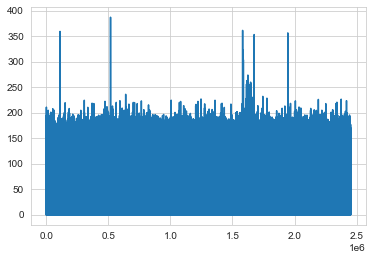

In [5]:
plt.plot(agent.model.losses)

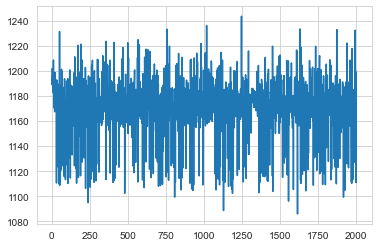

In [6]:
plt.plot(portfolio_value)

episode end value: 1077.88, duration: 0:00:00.068033
Sell: 100 times, Buy: 95 times


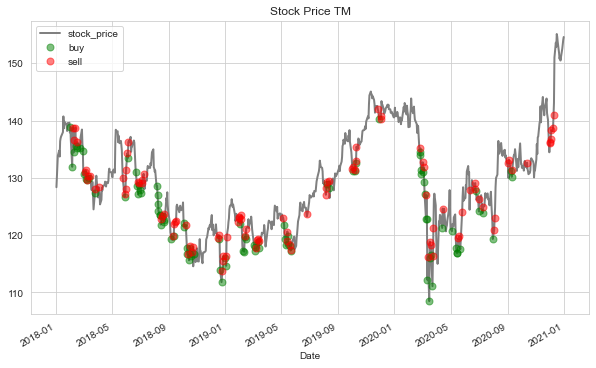

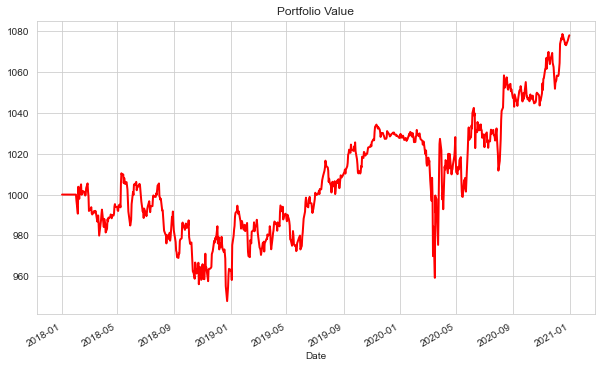

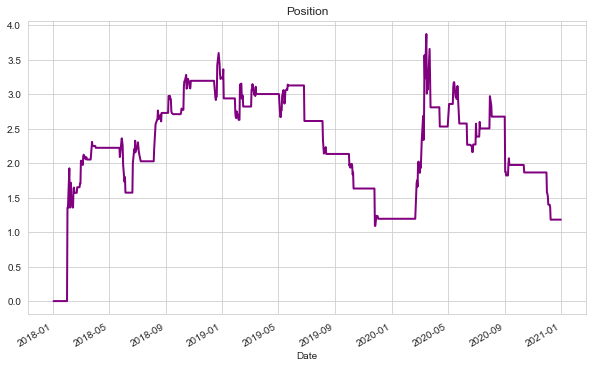

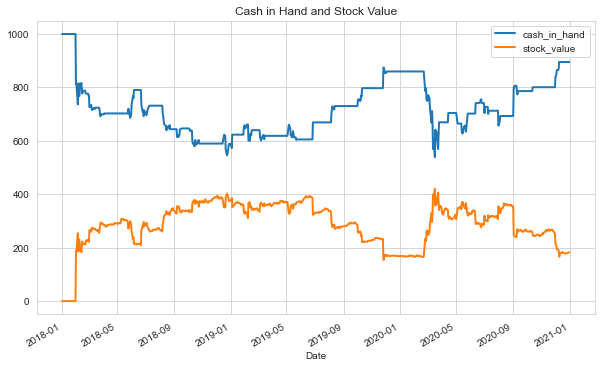

In [12]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [13]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: TM
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 2.53 %
Volatility: 0.0699
shape ratio: 0.2049
Maximun drawdown: -7.24 %
Calmar ratio: 0.3495
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 6.39 %
Volatility (benchmark): 0.2166
shape ratio: 0.2440
Maximun drawdown: -25.20 %
Calmar ratio (benchmark): 0.2534


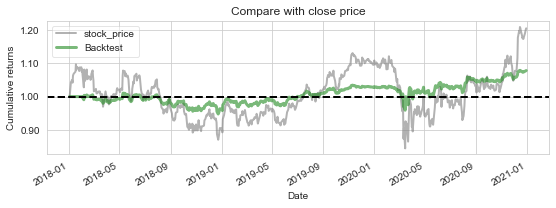

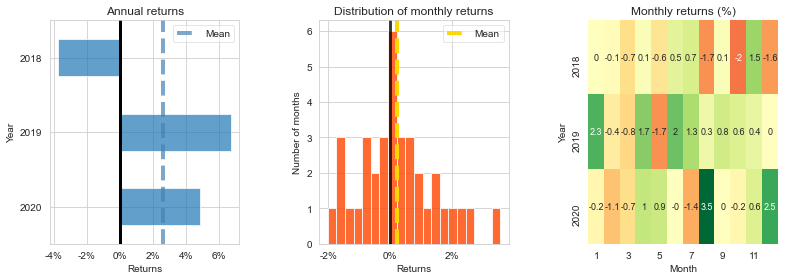

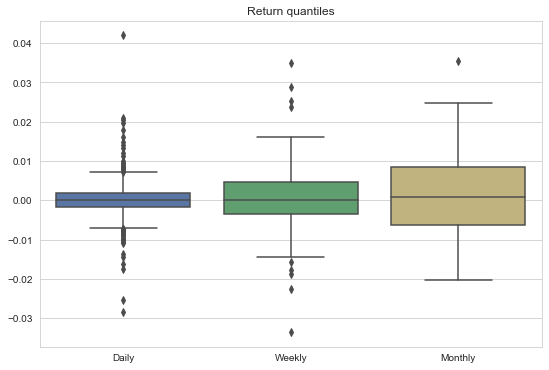

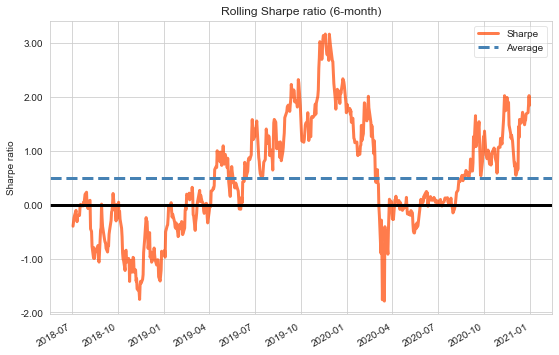

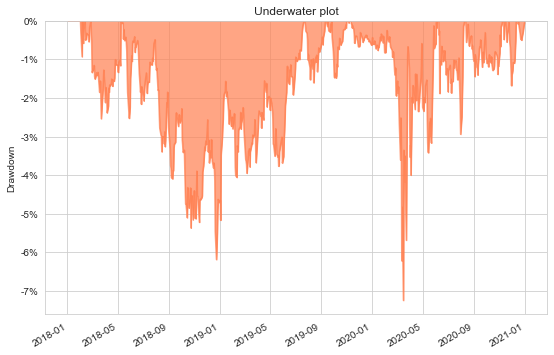

In [14]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')